# The Logistic Regression Cost Function

## Introduction

Previously, we fit our graph with logistic regression, and we saw how we can use the results of fitting our logistic regression function to our dataset.  Now, in this lesson we ask the question, well how did we get there?  That is, what's the cost function that allows us to draw this decision boundary?

## Our Initial Attempts

Let's start by looking at some of our cancer data.

$J(X) = - \sum y_ilog(p) +  (1-y_i) log (1 - p)  $ 

### Visualizing the Loss

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
data = load_breast_cancer()

In [47]:
import pandas as pd
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = pd.Series(data['target'])

In [12]:
X[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


First let's write the hypothesis function.

In [13]:
def h(x, param):
    return 1/(1 + np.exp(-x*param))

In [49]:
def logistic_loss(X, param, y):
    return -(y*np.log(h(X, param)) + (1 - y)*np.log(1 - h(X, param)))

In [38]:
import numpy as np
mean_areas = X['mean area']
params = np.linspace(.001, .007, 40)
first_area = mean_areas.iloc[0]

logistic_losses = [logistic_loss(first_area, param, 1) for param in params]

In [39]:
X['mean area'].iloc[0]

1001.0

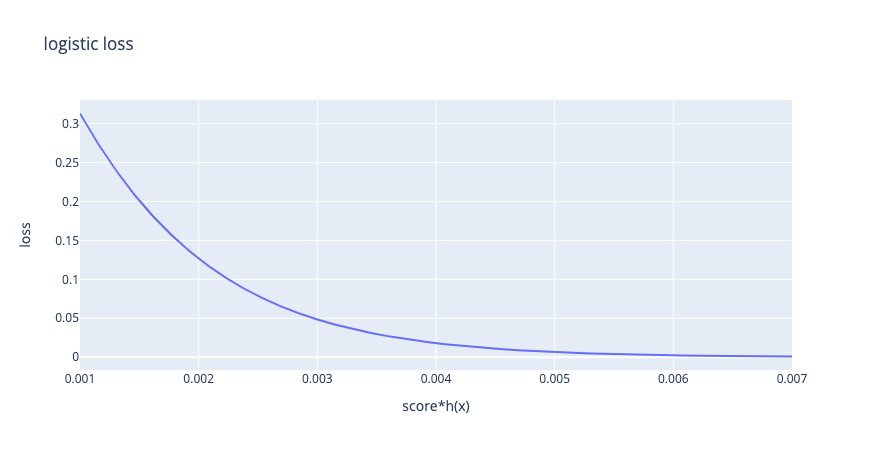

In [40]:
import plotly.graph_objects as go
logistic_loss_trace = go.Scatter(x = params, y = logistic_losses, 
                                 mode = 'lines', name = 'logistic loss')

go.Figure([logistic_loss_trace], 
          layout = {'title': 'logistic loss', 'xaxis': {'title': 'score*h(x)'}, 
                    'yaxis': {'title': 'loss'}})

Now let's try this for multiple observations.

In [50]:
def h(x, param):
    return 1/(1 + np.exp(-x*param))

In [51]:
h(first_area, .006)

0.9975421318088529

In [52]:
h_X = h(mean_areas, .006)

In [54]:
np.sum(logistic_loss(mean_areas, .006, y))

1275.0220860150826

So this the loss function we use for logistic regression.  The process of fitting our line now just uses gradient descent - like we saw in linear regression.  That is we try different parameters for our hypothesis function, input them into our logistic cost function, and choose the hypothesis function that minimizes our cost function.

In [55]:
def total_cost(coef, X, y):
    return np.sum(logistic_loss(X, coef, y))

In [88]:
params = np.linspace(-.0008, .0008, 20)

In [89]:
costs = [total_cost(param, mean_areas, y) for param in params]

In [90]:
# costs

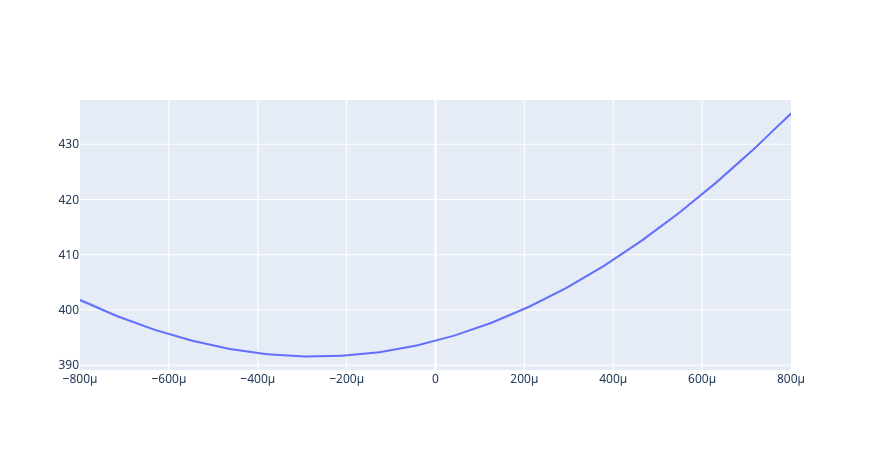

In [91]:
import plotly.graph_objects as go

scatter = go.Scatter(x = params, y = costs)
go.Figure(scatter)

### Summary

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)